<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week7/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

In [36]:
# 1. 데이터 로드 및 전처리
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/cifar10_data'
os.makedirs(DATA_DIR, exist_ok=True)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c) for c in selected_classes]

# 해당 클래스만 필터링
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# 라벨을 0~2로 다시 매핑
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)] for y in y_train])
y_test = np.array([label_map[int(y)] for y in y_test])


/tmp/ipython-input-2571700780.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-2571700780.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)] for y in y_test])


In [37]:
# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"선택된 클래스: {selected_classes}")
print(f"  - 학습 샘플 수: {len(x_train)}")
print(f"  - 테스트 샘플 수: {len(x_test)}\n")

선택된 클래스: ['cat', 'dog', 'horse']
  - 학습 샘플 수: 15000
  - 테스트 샘플 수: 3000



In [38]:
# 2. CNN 모델 정의
model = models.Sequential([
    # 첫 번째 합성곱 블록
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),   # 🔹 Conv 층 후 Dropout 추가

    # 두 번째 합성곱 블록
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),    # 🔹 Dropout 비율 조금 증가

    # 세 번째 합성곱 블록
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),    # 🔹 마지막 Conv 블록에 더 강하게

    # 완전 연결층
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),    # 🔹 Fully connected layer에도 Dropout 유지
    layers.Dense(3, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,563 (2.36 MB)

 Trainable params: 618,563 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# 3. 모델 컴파일 및 학습

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7777 - loss: 0.5114 - val_accuracy: 0.7813 - val_loss: 0.5162
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7944 - loss: 0.4879 - val_accuracy: 0.7897 - val_loss: 0.4985
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8056 - loss: 0.4622 - val_accuracy: 0.7883 - val_loss: 0.5017
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8023 - loss: 0.4689 - val_accuracy: 0.7867 - val_loss: 0.5036
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8004 - loss: 0.4603 - val_accuracy: 0.7830 - val_loss: 0.4991
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8123 - loss: 0.4440 - val_accuracy: 0.7910 - val_loss: 0.5038
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8183 - loss: 0.4405 - val_accuracy: 0.7883 - val_loss: 0.4954
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8214 - loss: 0.4269 - val_accuracy: 

In [41]:
# 4. 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ 테스트 정확도: {test_acc:.4f}")
print(f"✅ 테스트 손실: {test_loss:.4f}")


✅ 테스트 정확도: 0.8017
✅ 테스트 손실: 0.4851


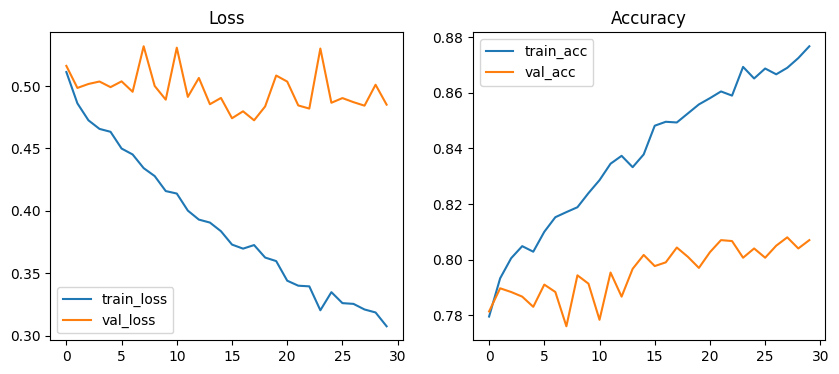

In [42]:
# 5. 학습 과정 시각화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


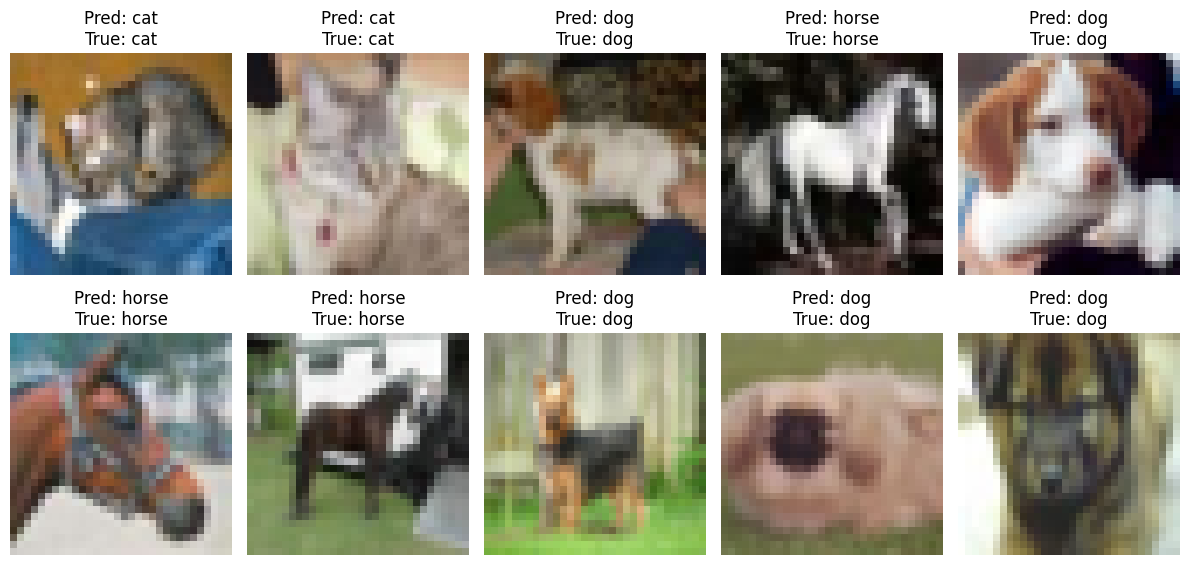

In [43]:
# 6. 예측 결과 시각화


pred = model.predict(x_test)
pred_labels = np.argmax(pred, axis=1)

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {selected_classes[pred_labels[i]]}\nTrue: {selected_classes[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Dropout을 더 추가한 결과 훈련 데이터에 대한 과도한 적합(OverFitting)이 줄어들었고,
# 검증 데이터에서의 안정성이 향상된 것을 볼 수 있고, Epoch수가 늘어날수록 정확도도 나아지는 모습을 확인할 수 있었다